# **Tennis Ace**

#### Here i've created tested and build several regression models that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) data, this model will determine what it takes to be one of the best tennis players in the world.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### tennis_stats.csv is data from the men’s professional tennis league, which is called the [ATP (Association of Tennis Professionals)](https://www.atptour.com/). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

In [2]:
# loading and investigating the data:
df = pd.read_csv('tennis_stats.csv')
df.head()


,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


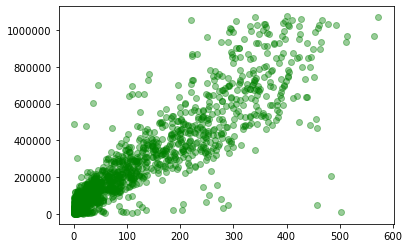

In [3]:
# performing exploratory analysis:
plt.figure()
plt.scatter(df.BreakPointsOpportunities, df.Winnings, alpha = 0.4, color = 'green')
plt.show()

# There is a strong relationship between the BreakPointsOpportunities feature and the Winnings outcome.

## Single Feature Linear Regression

With `FirstServeReturnPointsWon` Feature

In [12]:
## performing single feature linear regressions  :

features = df[['FirstServeReturnPointsWon']]
outcome = df[['Winnings']]


## Train - test Split
feature_train, feature_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8, test_size = 0.2, random_state = 6)


## Model fitting
lm = LinearRegression()
lm.fit(feature_train, outcome_train)


## Model R^2
print('This single feature Linear model R^2 value is {}'.format(lm.score(feature_test, outcome_test)))

This single feature Linear model R^2 value is 0.06258032988574369


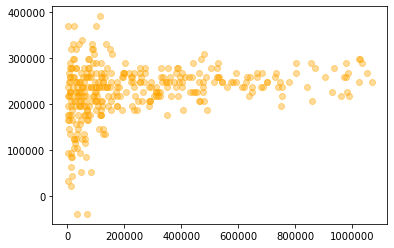

In [14]:
plt.figure()
## Comparison plotting
predict = lm.predict(feature_test)
plt.scatter(outcome_test, predict, alpha = 0.4,color = 'orange')
plt.show()

#### Obviously it does not fit

## Another Single Feature Linear Regression

With `BreakPointsOpportunities` Feature

In [28]:
## performing another single feature linear regressions  :

features1 = df[['BreakPointsOpportunities']]
outcome1 = df[['Winnings']]


## Train - test Split
feature1_train, feature1_test, outcome1_train, outcome1_test = train_test_split(features1, outcome1, train_size = 0.8, test_size = 0.2, random_state = 6)


## Model fitting
lm1 = LinearRegression()
lm1.fit(feature1_train, outcome1_train)


## Model R^2
print('This single feature Linear model R^2 value is {}'.format(lm1.score(feature1_test, outcome1_test)))

This single feature Linear model R^2 value is 0.8081205523550063


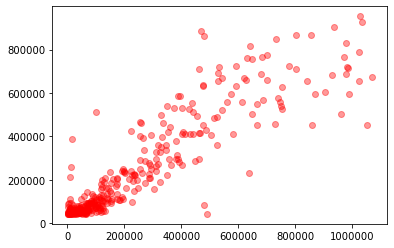

In [17]:
## Comparison plotting
plt.figure()
predict1 = lm1.predict(feature1_test)
plt.scatter(outcome1_test, predict1, alpha = 0.4, color = 'red')
plt.show()

## Performing Double feature linear regressions  :

With `BreakPointsOpportunities` and `FirstServeReturnPointsWon` Feature

In [19]:
features1 = df[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
outcome1 = df[['Winnings']]


## Train - test Split
feature1_train, feature1_test, outcome1_train, outcome1_test = train_test_split(features1, outcome1, train_size = 0.8, test_size = 0.2, random_state = 6)


## Model fitting
lm1 = LinearRegression()
lm1.fit(feature1_train, outcome1_train)


## Model R^2
print('This single feature Linear model R^2 value is {}'.format(lm1.score(feature1_test, outcome1_test)))

This single feature Linear model R^2 value is 0.8099289371304075


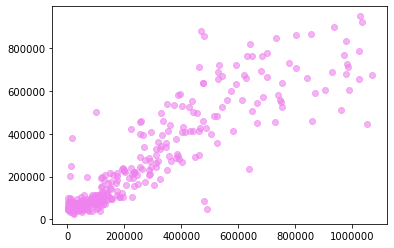

In [25]:
## Comparison plotting
plt.figure()
predict1 = lm1.predict(feature1_test)
plt.scatter(outcome1_test, predict1, alpha = 0.6, color = 'violet')
plt.show()

## Performing Multiple feature linear regressions  :

With 18 Features

In [31]:
features1 = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome1 = df[['Winnings']]


## Train - test Split
feature1_train, feature1_test, outcome1_train, outcome1_test = train_test_split(features1, outcome1, train_size = 0.8, test_size = 0.2, random_state = 6)


## Model fitting
lm1 = LinearRegression()
lm1.fit(feature1_train, outcome1_train)


## Model R^2
print('This single feature Linear model R^2 value is {}'.format(lm1.score(feature1_test, outcome1_test)))

This single feature Linear model R^2 value is 0.8290563866666136


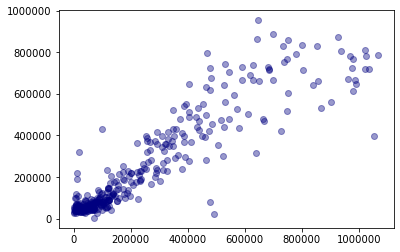

In [27]:
## Comparison plotting
plt.figure()
predict1 = lm1.predict(feature1_test)
plt.scatter(outcome1_test, predict1, alpha = 0.4, color = 'navy')
plt.show()